### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

## Libraries Imported
* Pandas
* Numpy
* Matplotlib
* sklearn
    * StandardScaler
    * PCA
    * LabelEncoder

In [27]:
# Do imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

### Read In Data to Dataframe

In [28]:
# Create DataFrame
df = pd.read_csv('./data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [29]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [30]:
len(df['AirportFrom'].unique())

293

In [31]:
df['Time_encoded'] = df['Time'].apply(lambda x: f"{x // 60:02d}:{x % 60:02d}")
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded
0,1,CO,269,SFO,IAH,3,15,205,1,00:15
1,2,US,1558,PHX,CLT,3,15,222,1,00:15
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20
4,5,AS,108,ANC,SEA,3,30,202,0,00:30


### Preprocessing : Encoding 'AirportFrom', 'AirportTo', 'Airline' Columns

In [32]:
airport_codes = df['AirportFrom'].unique()
airport_codes

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

### Make a copy of Dataframe for preprocessing

In [33]:
encoded_df = df.copy()

In [34]:
unique_codes = encoded_df['AirportFrom'].unique()
code_to_id = {code: idx for idx, code in enumerate(unique_codes, start=1)}

# Apply the mapping to create a new column with unique IDs
encoded_df['AirportFroIDs'] = encoded_df['AirportFrom'].map(code_to_id)
encoded_df['AirportToIDs'] = encoded_df['AirportTo'].map(code_to_id)

encoded_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded,AirportFroIDs,AirportToIDs
0,1,CO,269,SFO,IAH,3,15,205,1,00:15,1,103
1,2,US,1558,PHX,CLT,3,15,222,1,00:15,2,109
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20,3,72
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20,1,72
4,5,AS,108,ANC,SEA,3,30,202,0,00:30,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,23:59,194,229
539379,539380,FL,398,SEA,ATL,5,1439,305,0,23:59,22,55
539380,539381,FL,609,SFO,MKE,5,1439,255,0,23:59,1,17
539381,539382,UA,78,HNL,SFO,5,1439,313,1,23:59,12,1


In [37]:
# Get unique airline codes
unique_airlines = encoded_df['Airline'].unique()

# Create a random mapping for each unique airline code
random.seed(42)  # Set a seed for reproducibility, remove if you want different random results each time
airline_to_id = {airline: random.randint(1000, 9999) for airline in unique_airlines}

# Apply the random mapping to the airline column
encoded_df['airline_id'] = encoded_df['Airline'].map(airline_to_id)

encoded_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded,AirportFroIDs,AirportToIDs,airline_id
0,1,CO,269,SFO,IAH,3,15,205,1,00:15,1,103,2824
1,2,US,1558,PHX,CLT,3,15,222,1,00:15,2,109,1409
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20,3,72,5506
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20,1,72,5506
4,5,AS,108,ANC,SEA,3,30,202,0,00:30,4,22,5012


In [38]:
# Drop all the categorical columns
encoded_df = encoded_df.drop(columns=['Airline', 'AirportFrom', 'AirportTo'])

<Axes: ylabel='Frequency'>

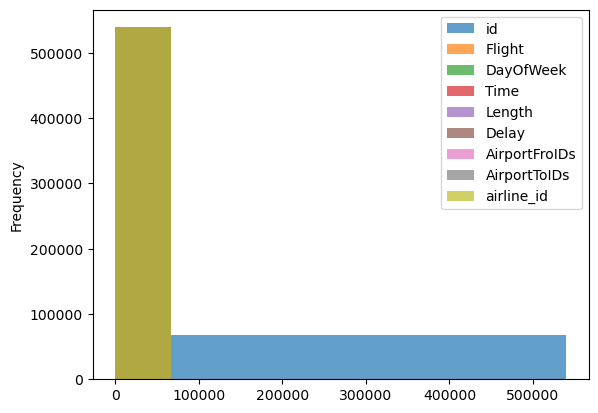

In [39]:
encoded_df.plot(kind='hist', bins=8, alpha=0.7)

### KMeans Model On Original Data

In [26]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_list = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k_list:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=i)
# 2. Fit the model to the data using the scaled DataFrame
    model.fit(encoded_df)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k_list": k_list,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

ValueError: could not convert string to float: '00:15'

# Dataframe Cleaned & Pre-Processed

Check to see which one performs better StandardScaler() or PCA

In [184]:
scaler = StandardScaler()

In [185]:
scaled_df = scaler.fit_transform(encoded_df)
scaled_df

ValueError: could not convert string to float: '00:15'

Create a Dataframe with the scaled data


In [124]:
scaled_df = pd.DataFrame(scaled_df, columns=['Flight','DayOfWeek','Time','Length','Delay','AirlineID','AirportFroIDs','AirportToIDs'])
scaled_df

,Flight,DayOfWeek,Time,Length,Delay,AirlineID,AirportFroIDs,AirportToIDs
0,-1.044258,-0.485552,-2.833092,1.038237,1.115778,-1.005308,1.371682,-0.115221
1,-0.420778,-0.485552,-2.833092,1.280689,1.115778,0.879222,0.918165,-1.060364
2,-0.013509,-0.485552,-2.815110,0.467761,1.115778,-1.570667,0.124511,-0.808326
3,0.018415,-0.485552,-2.815110,0.895618,1.115778,-1.570667,1.371682,-0.808326
4,-1.122133,-0.485552,-2.779144,0.995451,-0.896236,-1.382214,-1.639164,1.359202
...,...,...,...,...,...,...,...,...
539378,-1.088274,0.559019,2.288369,2.763925,-0.896236,-1.005308,0.741798,1.510425
539379,-0.981862,0.559019,2.288369,2.464425,-0.896236,-0.251496,1.359084,-1.614848
539380,-0.879803,0.559019,2.288369,1.751331,-0.896236,-0.251496,1.371682,0.502272
539381,-1.136644,0.559019,2.288369,2.578520,1.115778,0.690769,-0.203028,1.371804


PCA to reduce the dimensionality of the transformed  